In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

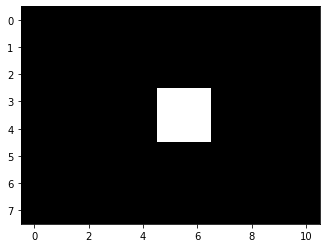

In [6]:
img_matrix = np.array([[1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,1,0,0,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1,1,1,1],
              ]).astype('uint8')
structuring_kernel = np.array([[1,1,1],
                               [1,1,1],
                               [1,1,1]]).astype('uint8')
inverted_img = np.invert(img_matrix)
plt.imshow(inverted_img, cmap = 'gray')

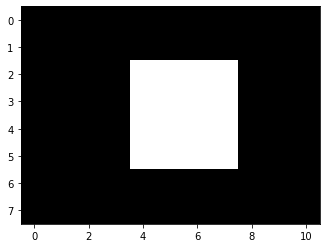

In [8]:
final_img = cv2.dilate(inverted_img, structuring_kernel)
plt.imshow(final_img, cmap = 'gray')

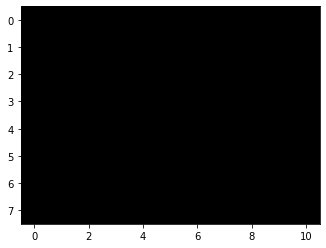

In [16]:
final_img = cv2.erode(inverted_img, structuring_kernel)
plt.imshow(final_img, cmap = 'gray')

## And if we invert the image, we could get away with only one operation

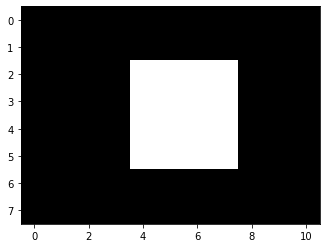

In [20]:
final_img = np.invert(cv2.erode(img_matrix, structuring_kernel))
plt.imshow(final_img, cmap = 'gray')